In [1]:
## jupyter notebook to simulate the range of the nuclear recoils in a given decay chain
## this notebook is tuned for the case of Rn-220 daughter implantation into 3 um SiO2 spheres

import numpy as np
import matplotlib.pyplot as plt
import alpha_recoil_sim as ar
import importlib

In [2]:
## make dictionary containing decay chain information for a given list of isotopes
path = "/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/Sphere_Recoils_MC"

iso_list = ['Po-216']

iso_dict = {}

for iso in iso_list:
    ciso = iso[:2].lower()
    cA = iso[-3:]
    iso_dict[iso] = ar.parse_decay_chain(path + "/decay_data/" + ciso + "_" + cA + "_decay_chain.txt")

In [3]:
## Load the Monte Carlo data from SRIM
import pickle

data_path = '/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/SRIM_Data/'

with open(data_path + 'SRIM_MC_events.pkl', 'rb') as f:
    MC_dict = pickle.load(f)

In [100]:
## Run over the isotopes and various shell materials, and save data
importlib.reload(ar)

sim_name = "Pb212_implant"
iso_list = ['Po-216']
shell_mat = ['SiO2']
shell_thick = [1] ## 1 nm thick SiO2 shell for starting decays
N = 20000

out_path = '/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/SRIM_Data/'

sim_dict = {}

for iso in iso_list:
    for j,shell in enumerate(shell_mat):

        print("Working on %d events for %s with %s shell"%(N, iso, shell))

        sphere_dict = {"inner_radius": 3000, "outer_shell_thick": shell_thick[j], 
                       "inner_material": "SiO2", "shell_material": shell,
                       "starting_loc": "shell"}

        sim_dict[iso + "_" + shell] = ar.sim_N_events(N, iso, iso_dict, sphere_dict, MC_dict)

with open(data_path + 'simulation_data_%s.pkl'%sim_name, 'wb') as f:
    pickle.dump(sim_dict, f)

Working on 20000 events for Po-216 with SiO2 shell


In [97]:
with open(data_path + 'simulation_data_%s.pkl'%sim_name, 'rb') as f:
    sim_dict = pickle.load(f)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Found 25 bad points out of 20000: 0.125%


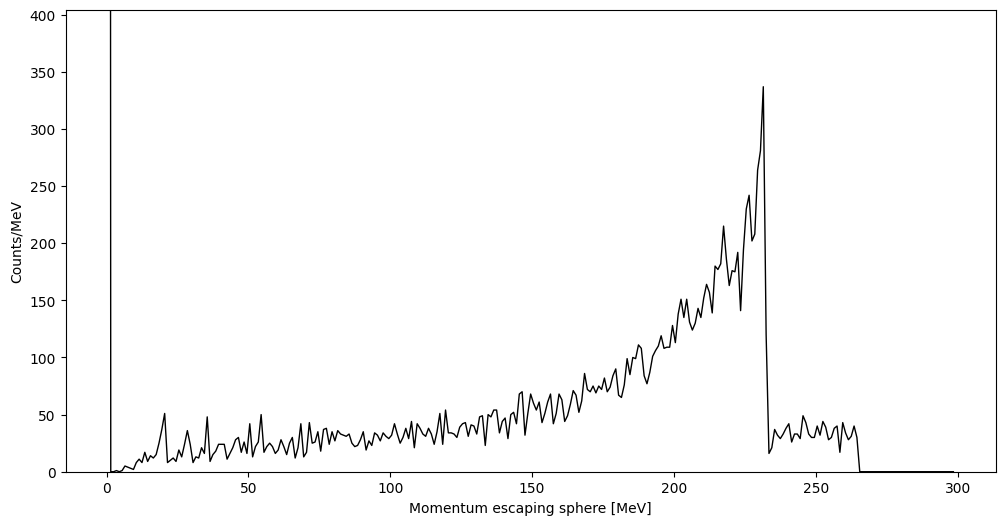

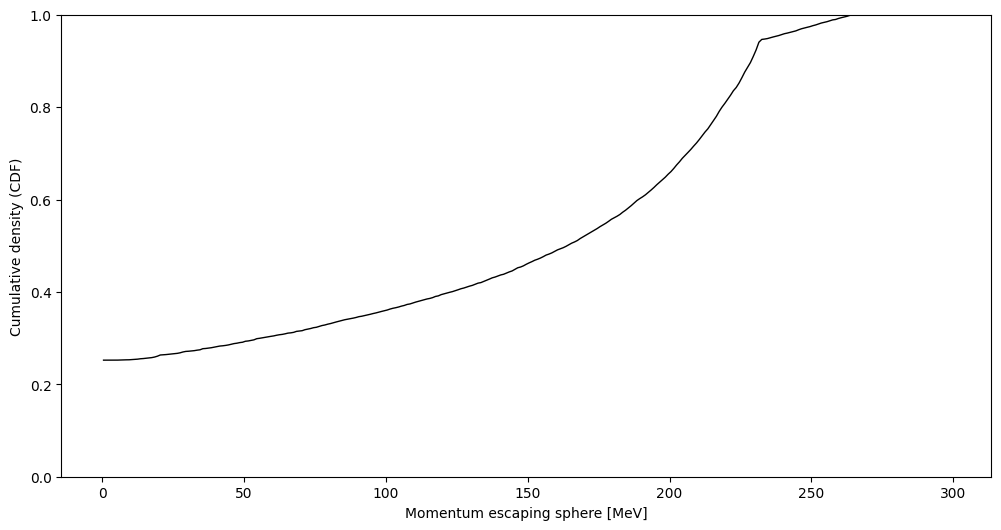

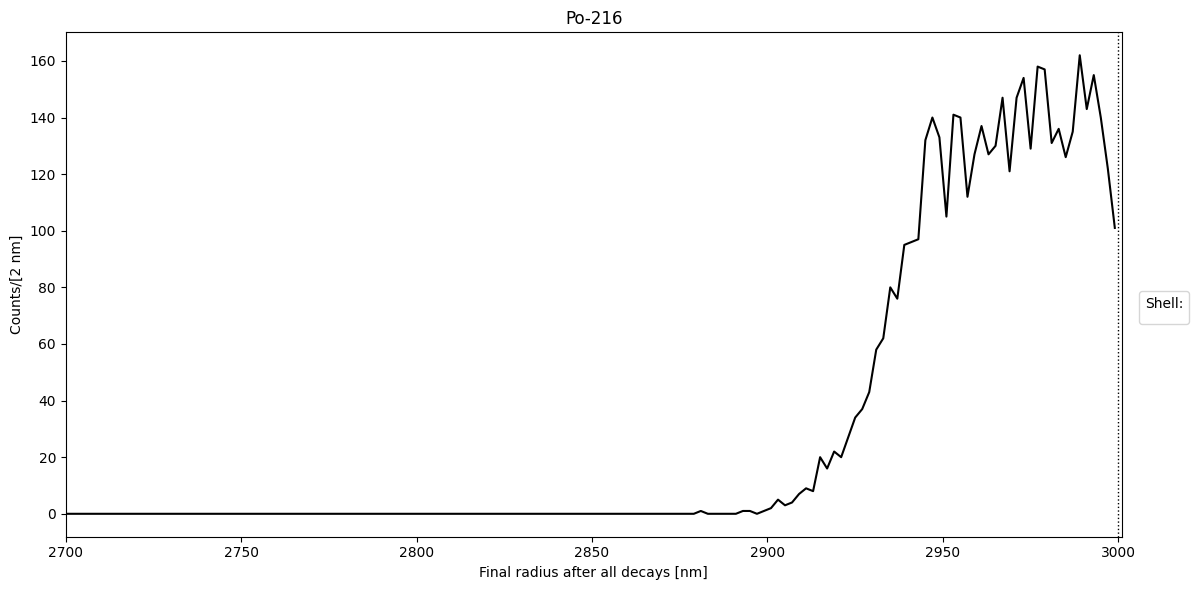

In [116]:
iso_list = ['Po-216']
shell_mat = ['SiO2']
shell_thick = [1]


# Make a plot of the final position distribution and escape fraction for each isotope
col_list = ['k', 'gold', 'gray']
importlib.reload(ar)

thresh_list = [0.5, 0.1, 0.01, 0.001]
sty = ['-', '--', ':']

fig_path = '/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/alpha_recoils_Grimm/plots/'

df = plt.figure(facecolor='white', figsize=(12,6))
df_cdf = plt.figure(facecolor='white', figsize=(12,6))
sf = plt.figure(facecolor='white', figsize=(12,6))
idx = 1

thickness_dict = {}

for iso in iso_list:
    for j,shell in enumerate(shell_mat):

        sphere_dict = {"inner_radius": 3000, "outer_shell_thick": shell_thick[j], "inner_material": "SiO2", "shell_material": shell}

        x, y, s, mom = ar.analyze_simulation( sim_dict[iso + "_" + shell], sphere_dict )
        plt.figure(df.number)
        #plt.subplot(2,3,idx)
        plt.plot(x,y,color=col_list[j]) #, label=shell)
        plt.xlabel("Final radius after all decays [nm]")
        plt.ylabel("Counts/[2 nm]")
        plt.xlim(2700, sphere_dict['inner_radius'] + sphere_dict['outer_shell_thick'])


        thick = np.interp(thresh_list, s[::-1], x[::-1])
        thickness_dict[iso + "_" + shell] = thick

    plt.figure(df.number)
    yy = plt.ylim()
    rin = sphere_dict['inner_radius']
    plt.plot([rin, rin], yy, 'k:', lw=1)
    plt.ylim(yy)
    plt.title(iso)

    bins = np.arange(300)
    hh, be = np.histogram(mom, bins=bins)
    bc = be[:-1] + np.diff(be)/2

    plt.figure(sf.number)
    plt.plot(bc, hh, 'k', lw=1)
    ym = np.max(hh[bc>1])*1.2
    plt.ylim(0,ym)
    plt.xlabel("Momentum escaping sphere [MeV]")
    plt.ylabel("Counts/MeV")

    plt.figure(df_cdf.number)
    plt.plot(bc, np.cumsum(hh)/np.sum(hh), 'k', lw=1)
    ym = np.max(hh[bc>1])*1.2
    plt.ylim(0,1)
    plt.xlabel("Momentum escaping sphere [MeV]")
    plt.ylabel("Cumulative density (CDF)")

    idx +=1

plt.figure(df.number)
#df.subplots_adjust(hspace=0.4)
leg=plt.legend(bbox_to_anchor=(1.07, 0.5), title="Shell:")
leg._legend_box.align = "left"
plt.tight_layout()
plt.savefig(fig_path + "range_vs_iso.pdf")





In [77]:
importlib.reload(ar)
sim_dict['Po-216_SiO2'][1].keys()

dict_keys(['parent', 'start_pos', 0, 1, 2, 3, 'final_pos', 'final_momentum'])

[ 153.24285292 -173.45352828  -19.34790835] 232.25813225805462
[0 0 0] 0.0
[177.13234788 -77.11673045 128.78828059] 232.18372035954633
[  51.16715304  -95.63121158 -153.53282979] 187.97801999170008
[0 0 0] 0.0


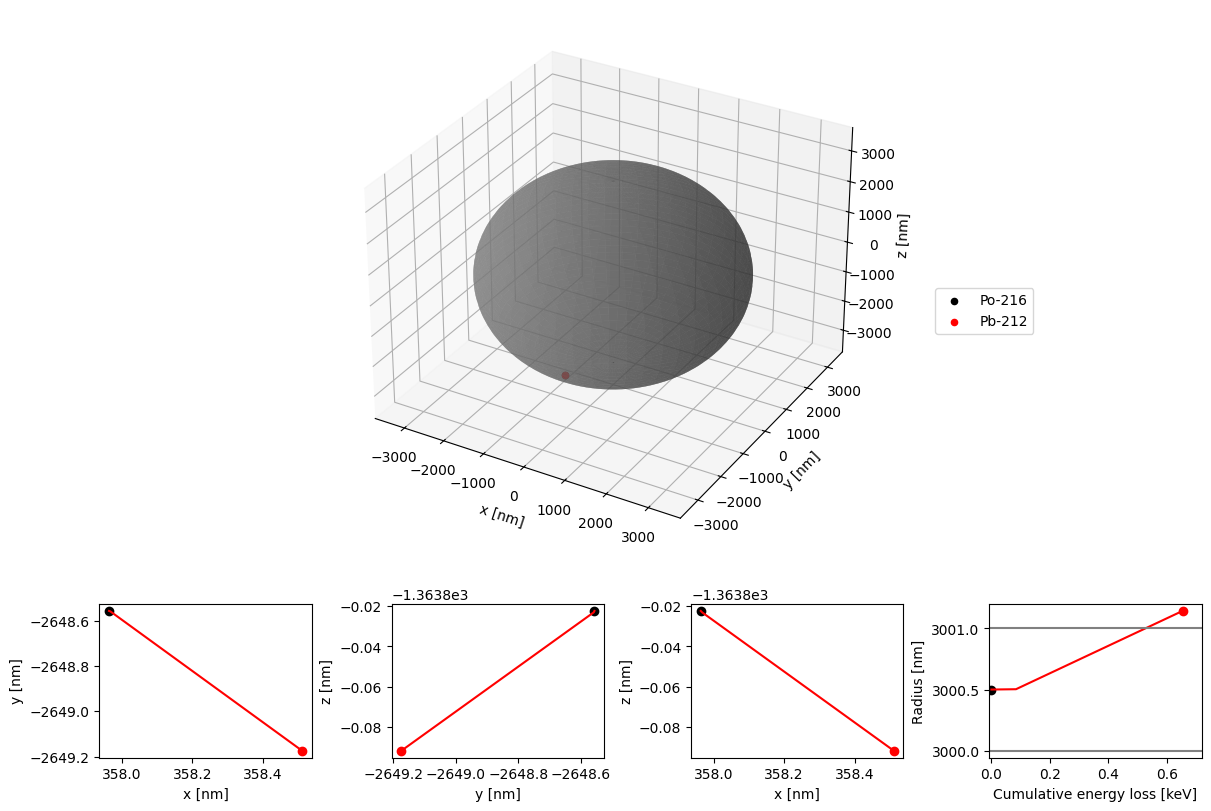

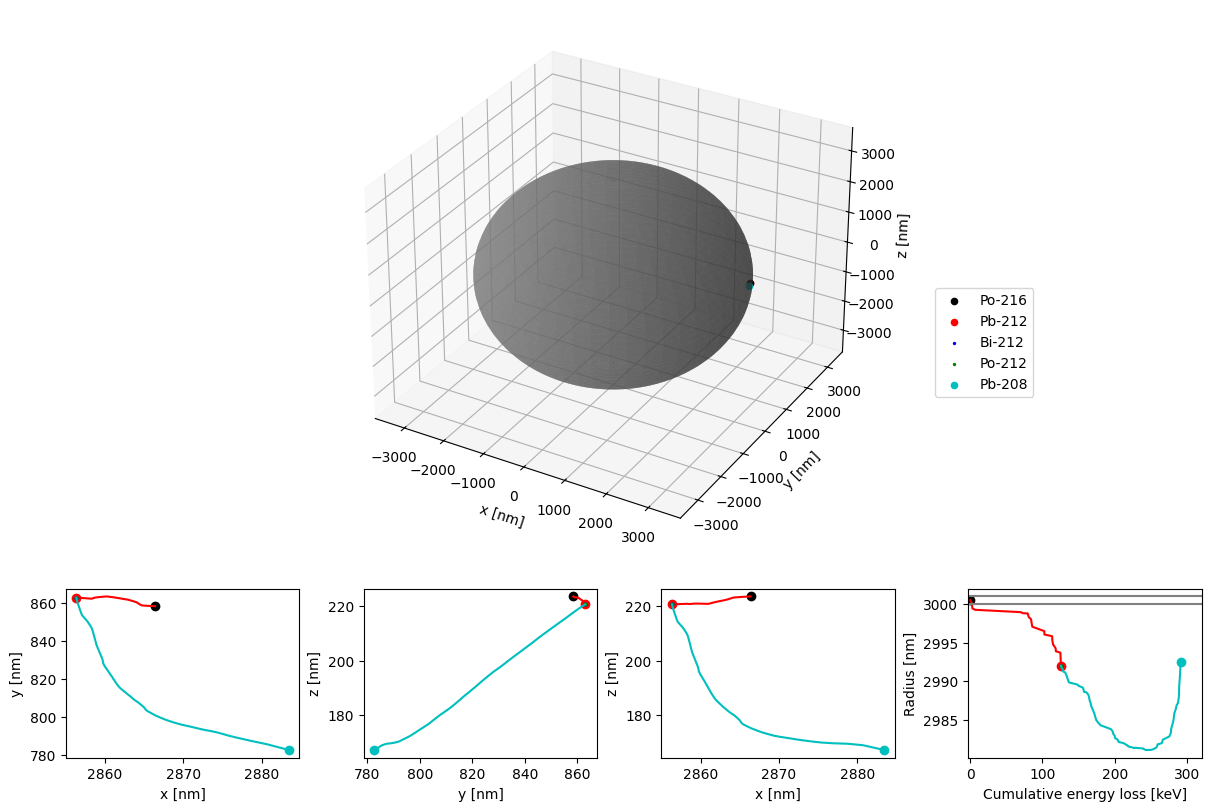

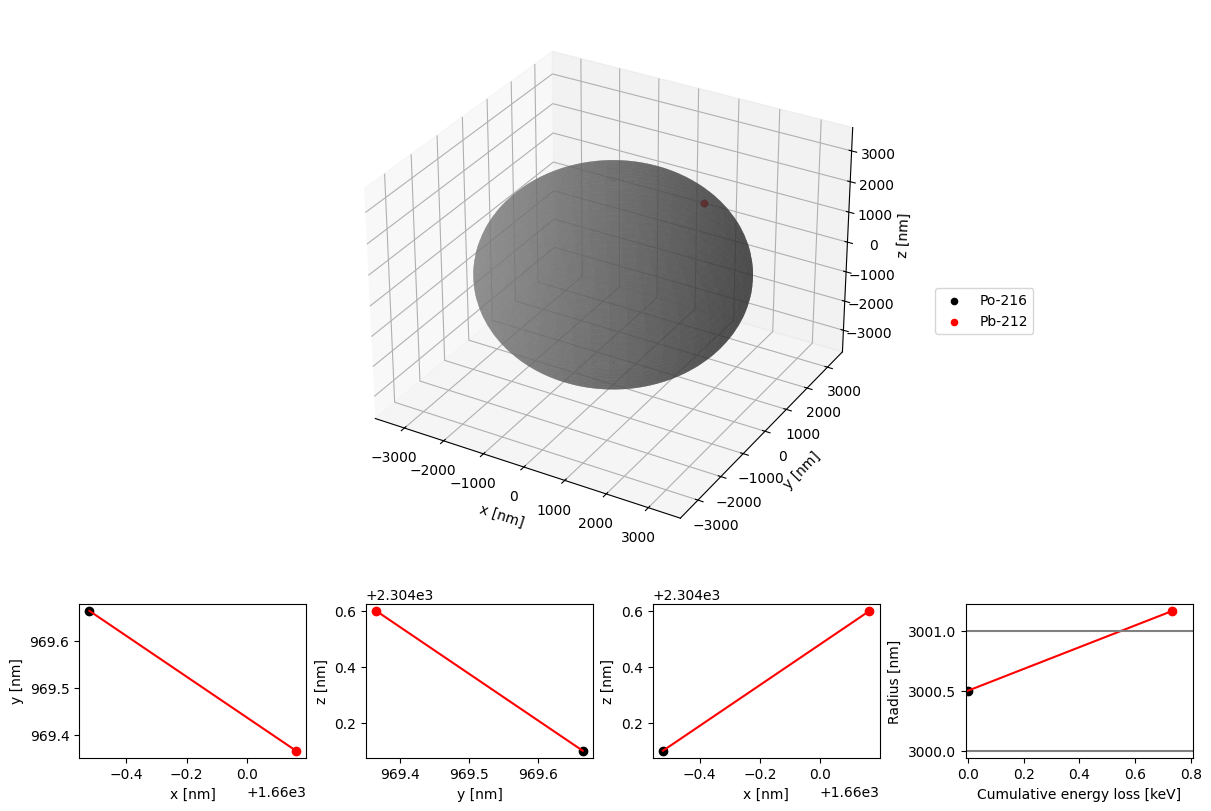

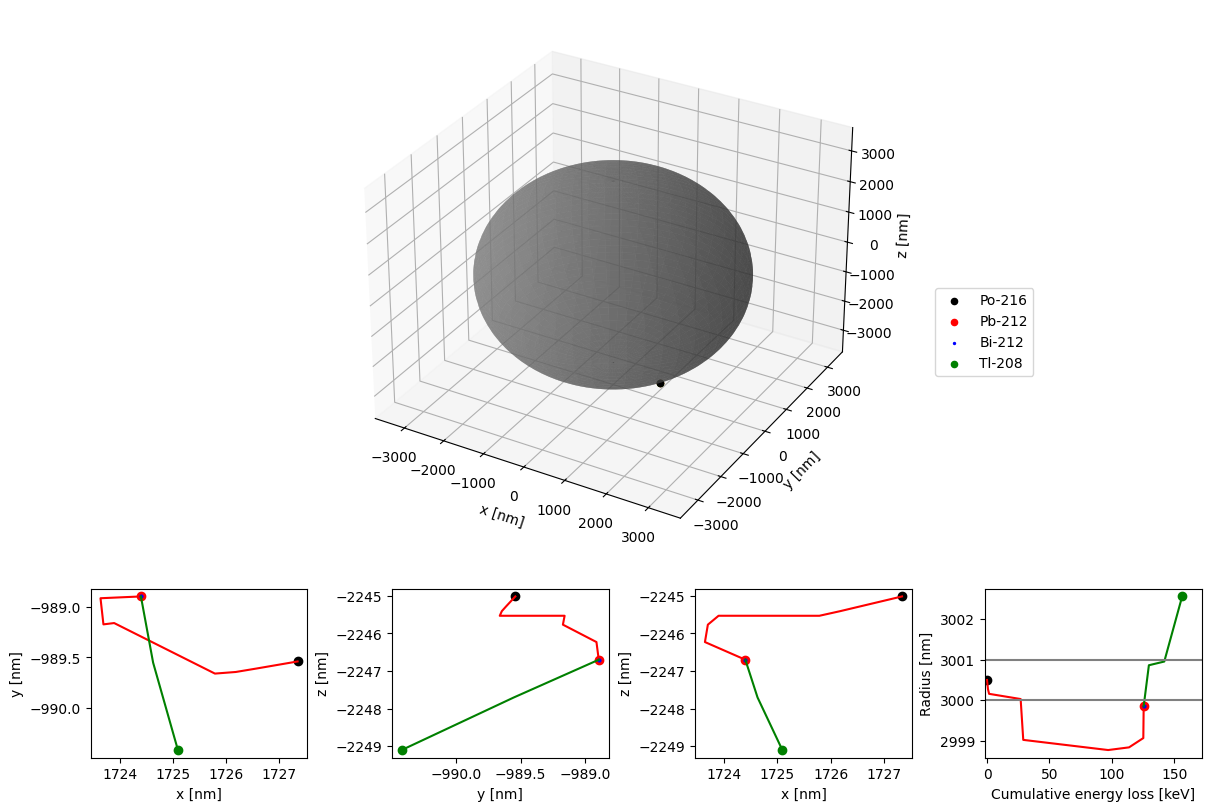

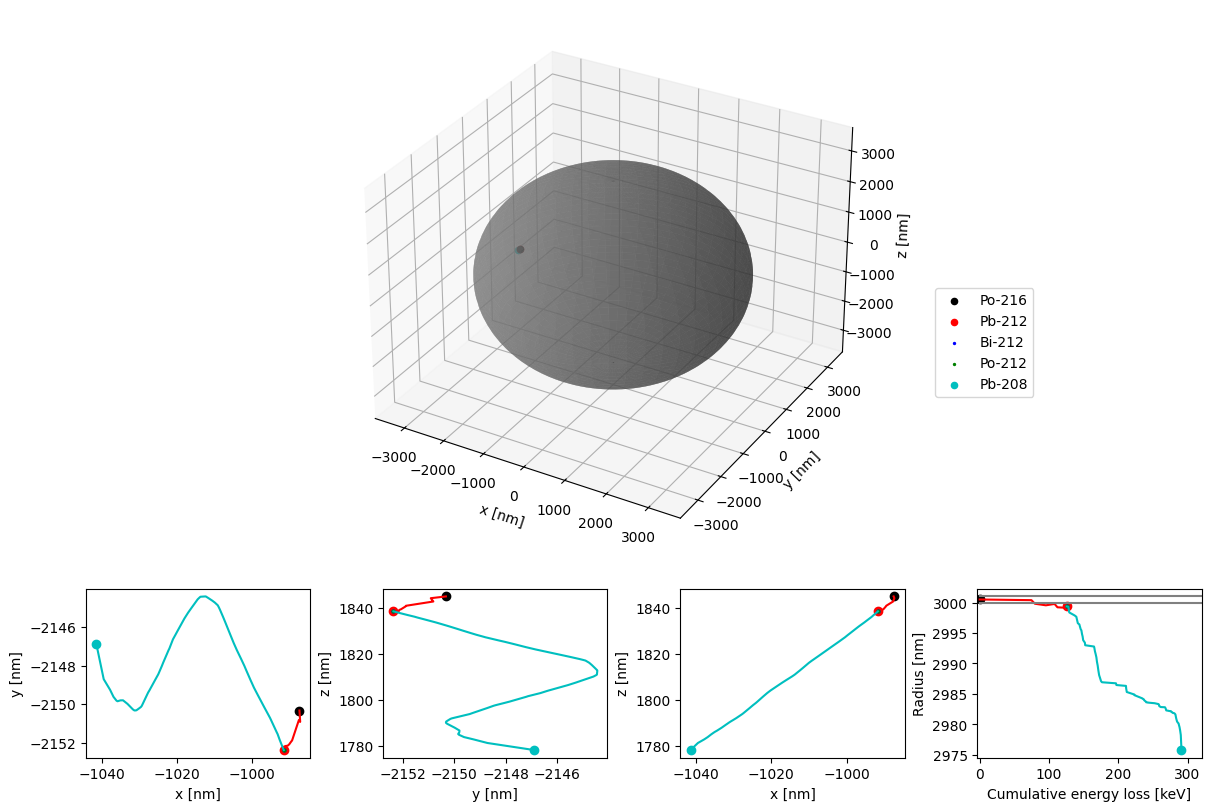

In [93]:
importlib.reload(ar)

iso = "Po-216"
shell = "SiO2"
num = 1

shell_mat = ['SiO2']
shell_thick = [1]

sphere_dict['shell_material'] = shell
sphere_dict['outer_shell_thick'] = 1

for num in range(5):
    fig = ar.plot_event(sim_dict[iso + "_" + shell][num], sphere_dict, rad_lims=[-1,-1], sphere_coords=True)
    #print(sim_dict[iso + "_" + shell][num]['final_momentum'], np.linalg.norm(sim_dict[iso + "_" + shell][num]['final_momentum']))
#plt.savefig(fig_path + "examp_traj_%s_%s_%d.png"%(iso, shell, num), dpi=300)

plt.show()

In [85]:
sim_dict[iso + "_" + shell][1][0]


{'time': 0.007150547492661129,
 'energy': 125.52407407407408,
 'iso': 'Pb-212',
 'traj': array([[1.25524074e+02, 2.86637305e+03, 8.58438028e+02, 2.23584269e+02],
        [1.23630000e+02, 2.86600523e+03, 8.58493594e+02, 2.23551304e+02],
        [1.22530000e+02, 2.86521328e+03, 8.58647004e+02, 2.23397791e+02],
        [1.22530000e+02, 2.86521328e+03, 8.58647004e+02, 2.23397791e+02],
        [1.18820000e+02, 2.86502536e+03, 8.58683405e+02, 2.23361365e+02],
        [5.52040000e+01, 2.86466112e+03, 8.58848132e+02, 2.23282155e+02],
        [5.48810000e+01, 2.86452691e+03, 8.59172112e+02, 2.23261743e+02],
        [5.31830000e+01, 2.86425257e+03, 8.59814357e+02, 2.23200312e+02],
        [5.24370000e+01, 2.86414208e+03, 8.60138486e+02, 2.23133611e+02],
        [4.61440000e+01, 2.86403090e+03, 8.60451253e+02, 2.23029572e+02],
        [4.56690000e+01, 2.86385525e+03, 8.60691315e+02, 2.22865360e+02],
        [4.45860000e+01, 2.86329967e+03, 8.61393669e+02, 2.22386281e+02],
        [4.13800000e+01,

In [86]:
sim_dict[iso + "_" + shell][1][1]

{'time': 12914.754442714118,
 'energy': 0.0,
 'iso': 'Bi-212',
 'traj': array([[   0.        , 2856.34394713,  862.97242902,  220.67398057]])}

In [92]:
data = sim_dict[iso + "_" + shell][1][2]['traj']
data[-1,3]

220.67398057160162

In [88]:
sim_dict[iso + "_" + shell][1][3]

{'time': 13583.236598870784,
 'energy': 165.75471698113208,
 'iso': 'Pb-208',
 'traj': array([[1.65754717e+02, 2.85634395e+03, 8.62972429e+02, 2.20673981e+02],
        [1.65580000e+02, 2.85635491e+03, 8.62735462e+02, 2.20524538e+02],
        [1.64680000e+02, 2.85639318e+03, 8.61914978e+02, 2.20003919e+02],
        [1.63500000e+02, 2.85641387e+03, 8.61505989e+02, 2.19744074e+02],
        [1.62660000e+02, 2.85649441e+03, 8.60292686e+02, 2.18946619e+02],
        [1.60200000e+02, 2.85652352e+03, 8.59890130e+02, 2.18680854e+02],
        [1.59270000e+02, 2.85656364e+03, 8.59493605e+02, 2.18407831e+02],
        [1.58810000e+02, 2.85662338e+03, 8.58705495e+02, 2.17857677e+02],
        [1.57530000e+02, 2.85668567e+03, 8.57922215e+02, 2.17304613e+02],
        [1.56980000e+02, 2.85675079e+03, 8.57141768e+02, 2.16748177e+02],
        [1.55500000e+02, 2.85688121e+03, 8.55590952e+02, 2.15628426e+02],
        [1.54620000e+02, 2.85695415e+03, 8.54804714e+02, 2.15086352e+02],
        [1.42570000e+02, 2